## Name : Pravin Nandankar
## Roll No : 58
## Machine learning Practical 7
## Date :- 15/10/2024

#### Aim : - A shopkeeper keeps records of his customers like age, gender, and annual income. Now, he wants to enhance his business by offering attractive deals. How should the shopkeeper provide these offers to his customers. Create machine learning model using Kmeans algorithm and help shopkeeper to identify group of customers.

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('shop.csv')

In [19]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [21]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [84]:
df.dtypes

CustomerID                int64
Genre                     int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Cluster                   int32
cluster                   int32
dtype: object

In [101]:
X = df.drop(['Genre','Age','CustomerID'], axis = 1)
X.shape

(200, 4)

In [102]:
from sklearn.cluster import KMeans

In [126]:
my_cluster_model = KMeans(n_clusters=5)

In [127]:
my_cluster_model.fit(X)

KMeans(n_clusters=5)

In [128]:
df['cluster'] = my_cluster_model.labels_

In [129]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,cluster
0,1,1,19,15,39,0,0
1,2,1,21,15,81,0,4
2,3,0,20,16,6,1,0
3,4,0,23,16,77,1,4
4,5,0,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,0,35,120,79,1,1
196,197,0,45,126,28,1,2
197,198,1,32,126,74,0,1
198,199,1,32,137,18,0,2


In [130]:
my_cluster_model.cluster_centers_

array([[26.30434783, 20.91304348,  0.60869565,  0.60869565],
       [86.53846154, 82.12820513,  0.53846154,  0.53846154],
       [88.2       , 17.11428571,  0.45714286,  0.45714286],
       [55.2962963 , 49.51851852,  0.59259259,  0.59259259],
       [25.72727273, 79.36363636,  0.59090909,  0.59090909]])

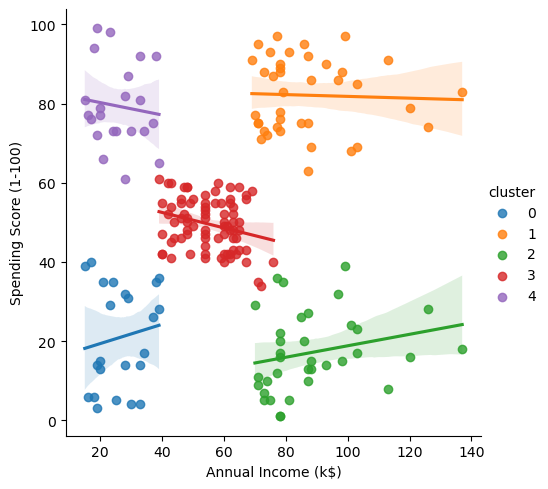

In [131]:
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, hue='cluster');  #seaborn.lmplot() method is used to draw a scatter plot.
plt.show()

In [132]:
## Finding K Value
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [133]:
wcss

[270079.83999999997,
 181461.63232323233,
 106446.05463941277,
 73777.45754503315,
 44545.915488376355,
 37331.17269438873,
 30355.93394214481,
 25097.980539924847,
 21957.55617607031,
 19835.97464519069]

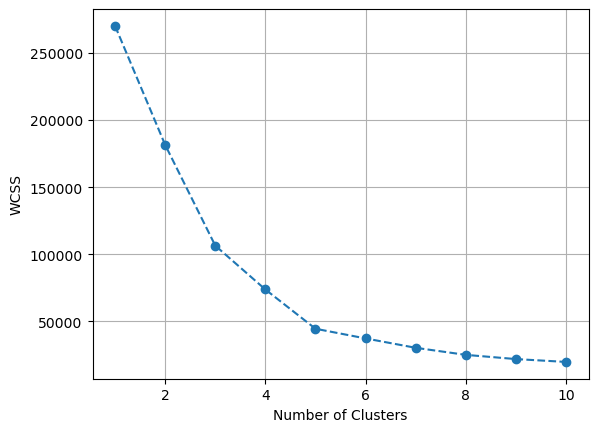

In [134]:
plt.plot(range(1,11),wcss,"o--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [135]:
from sklearn.metrics import silhouette_score
# s = (b - a) / max(a, b)

In [138]:
range_n_clusters = [2, 3, 4, 5, 6, 8]
for n_clusters in range_n_clusters:
    my_cluster_model = KMeans(n_clusters=n_clusters)
    m = my_cluster_model.fit_predict(X)
    silhouette_avg = silhouette_score(X, m)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.29653639739288246
For n_clusters = 3 The average silhouette_score is : 0.4670569963798376
For n_clusters = 4 The average silhouette_score is : 0.49245421063066225
For n_clusters = 5 The average silhouette_score is : 0.5529852605302708
For n_clusters = 6 The average silhouette_score is : 0.53689839960986
For n_clusters = 8 The average silhouette_score is : 0.4513792146665946


In [ ]:
## From above observation k = 5 is best paramter for it.